# Installing libraries

In [1]:
!pip install aif360
!pip install fairlearn
!pip install BlackBoxAuditing
!pip install adversarial-robustness-toolbox 
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 6.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=89158189251b44fcfdccc686225959e3d6e1c17f103e788a877e2e29e8b7e164
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver 

# Pre-processing steps

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/kaggle/input/case-combined/merged_subjects_data.csv')
data

,time,valence,arousal,video_x,Emotion,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video_y,SUBJECT,AGE,GENDER,EMOTION,video_name,vid_emotion
0,1061504,-1276.0,6252.0,8.0,Frustrated or Impatient,0.76062,35.053549,4.384464,27.174558,28.863552,7.86300,6.13825,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
1,1061554,-1276.0,6252.0,8.0,Frustrated or Impatient,0.79018,35.005141,4.360800,27.193884,28.849530,7.94525,5.76850,5.15250,8.0,1,30-34,F,scary,Mama (2008),scary-2
2,1061604,-1276.0,6268.0,8.0,Frustrated or Impatient,0.80990,35.809029,4.380504,27.213270,28.860030,8.06850,5.72750,5.02950,8.0,1,30-34,F,scary,Mama (2008),scary-2
3,1061654,-1276.0,6268.0,8.0,Frustrated or Impatient,0.83946,37.368456,4.384464,27.281031,28.863552,7.37025,6.09725,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
4,1061704,-1276.0,6288.0,8.0,Frustrated or Impatient,0.79018,37.145698,4.356864,27.271309,28.863552,7.65775,5.89175,5.11150,8.0,1,30-34,F,scary,Mama (2008),scary-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196278,2231442,0.0,0.0,7.0,Neutral,1.05632,37.949645,37.403472,46.155954,29.852173,5.39900,7.53450,5.89175,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196279,2231492,0.0,0.0,7.0,Neutral,0.81318,37.542807,37.419240,46.223715,29.852173,5.64550,7.98625,5.85075,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196280,2231542,0.0,0.0,7.0,Neutral,0.82632,36.961677,37.320672,46.301140,29.845152,5.56325,7.41125,5.72750,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196281,2231592,0.0,0.0,7.0,Neutral,0.83290,36.516101,37.407408,46.397951,29.862694,5.76850,7.57550,5.80975,12.0,29,25-29,M,scary,Shutter (2004),scary-1


In [3]:
data['Emotion'].unique()

array(['Frustrated or Impatient', 'Tensed or Annoyed',
       'Distressed or Defiant', 'Neutral', 'Confident or Attentive',
       'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy',
       'Worried or Apathetic', 'Frustrated or Discontented',
       'Aroused or Astonished', 'Miserable or Sad', 'Anxious or Dejected',
       'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'],
      dtype=object)

In [4]:
# Define positive and negative emotions
positive_emotions = [
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 
    'Delighted or Happy', 'Excited or Adventurous', 'Polite or Sleepy', 
    'Neutral', 'Aroused or Astonished'
]

# Add a new column 'Emotion_Type' to classify emotions as Positive or Negative
data['Emotion_Type'] = data['Emotion'].apply(
    lambda x: 'Positive' if x in positive_emotions else 'Negative'
)
# Define the columns to retain
columns_to_keep = [
    'ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_coru', 'emg_trap', 'emg_zygo',  # 8 physio features
    'Emotion', 'AGE', 'GENDER', 'Emotion_Type'  # Other required columns
]

# Create a new DataFrame retaining only the specified columns
data = data[columns_to_keep]

In [5]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


Gender and Age Distribution (Heatmap Data):
AGE     20-24  25-29  30-34  35-39
GENDER                            
F       47654  32822  13625      0
M       20440  61304   6812  13626
Total Instances: 196283


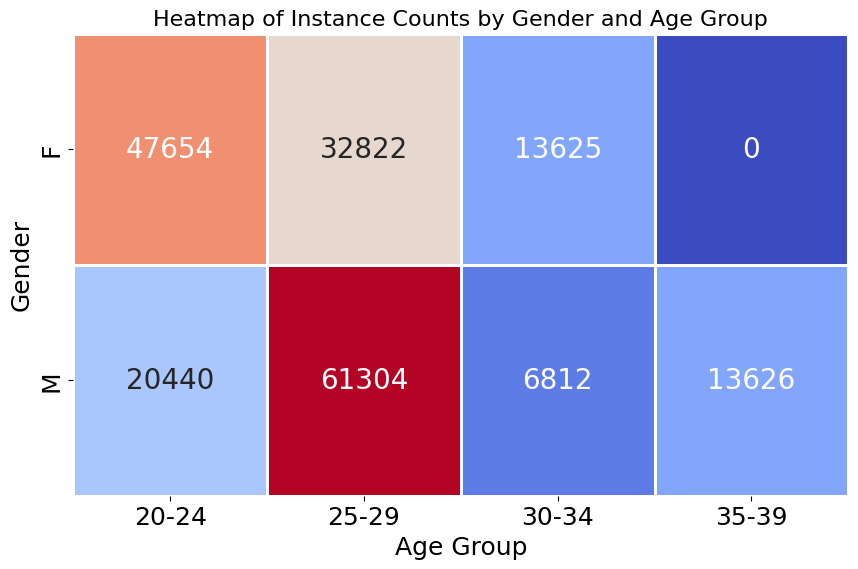


Emotion Type Counts and Percentages:
Emotion
Neutral                       108843
Confident or Attentive         18418
Passionate or Amused           17212
Frustrated or Impatient        16325
Distressed or Defiant          11175
Worried or Apathetic            6601
Tensed or Annoyed               4845
Delighted or Happy              4296
Pleased or Glad                 2963
Frustrated or Discontented      1823
Tired or Bored                  1195
Aroused or Astonished           1152
Polite or Sleepy                 982
Miserable or Sad                 247
Anxious or Dejected              157
Excited or Adventurous            49
Name: count, dtype: int64
Emotion
Neutral                       55.452077
Confident or Attentive         9.383390
Passionate or Amused           8.768971
Frustrated or Impatient        8.317073
Distressed or Defiant          5.693310
Worried or Apathetic           3.363001
Tensed or Annoyed              2.468375
Delighted or Happy             2.188677
Pleased 

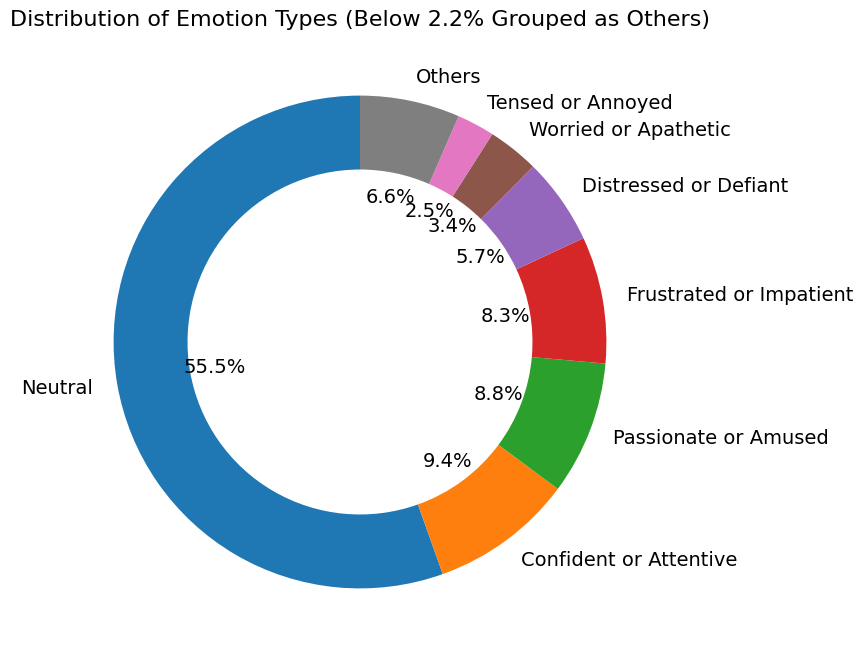


Number of Instances with 'Neutral': 108843

Emotion Type Counts (Excluding Neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sleepy                982
Miserable or Sad                247
Anxious or Dejected             157
Excited or Adventurous           49
Name: count, dtype: int64
Total Instances (Excluding Neutral): 87440
Emotion Type Percentages (Excluding Neutral):
Emotion
Confident or Attentive        21.063586
Passionate or Amused          19.684355
Frustrated or Impatient       18.669945
Distressed or Defiant         12.780192
Worried or Apathetic           7.549177
Tensed or Annoyed              5.540942
Del

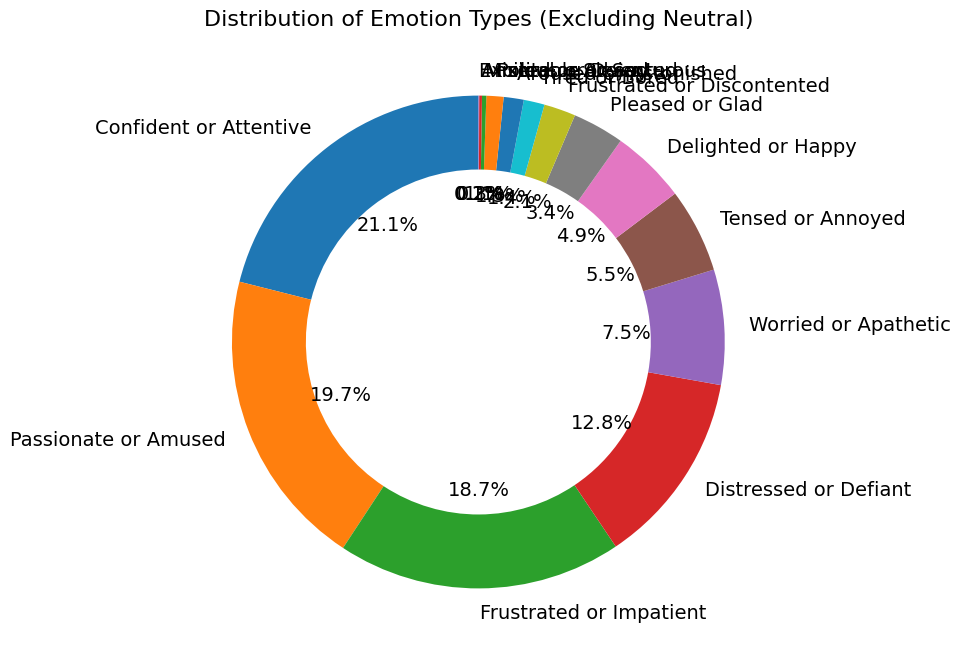


Age Group Distribution:
AGE
25-29    94126
20-24    68094
30-34    20437
35-39    13626
Name: count, dtype: int64
Total Instances in Age Groups: 196283


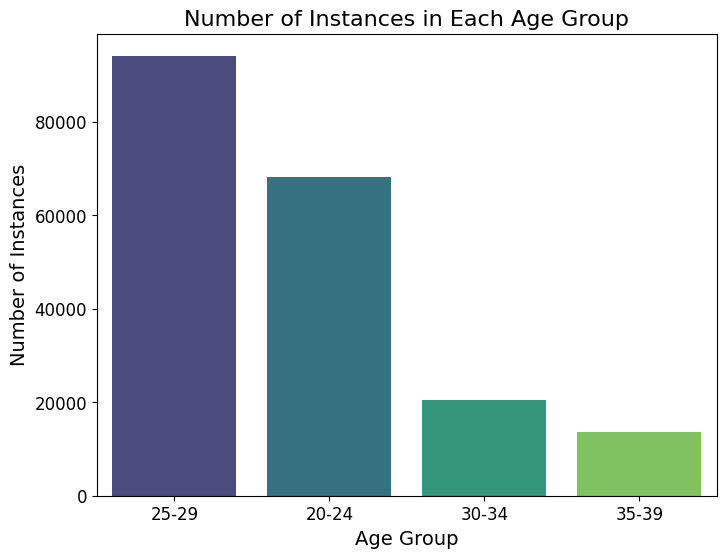


Gender Distribution:
GENDER
M    102182
F     94101
Name: count, dtype: int64
Total Instances in Gender Classes: 196283


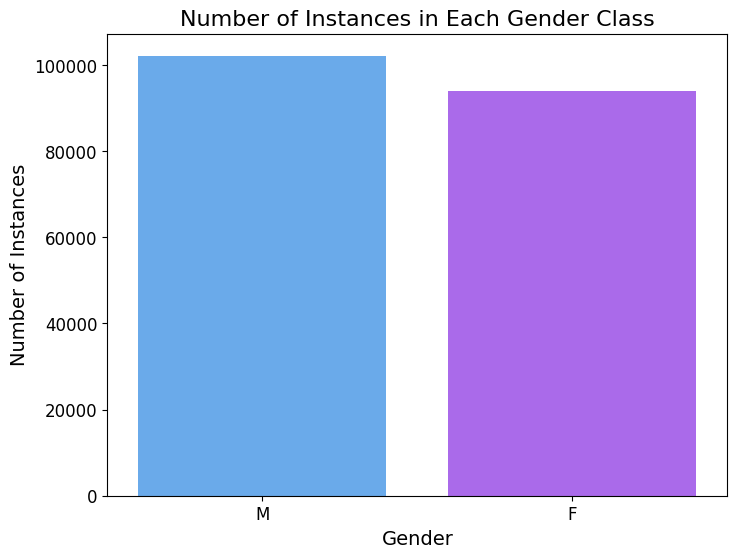

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your dataset)
# data = pd.read_csv("your_data.csv")

# 1. Heatmap for Gender and Age Distribution
plt.figure(figsize=(10, 6))

# Grouping data by Gender and Age and calculating the count
heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)

# Print the heatmap data and total count
print("Gender and Age Distribution (Heatmap Data):")
print(heatmap_data)
print(f"Total Instances: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data

# Create the heatmap
sns.heatmap(
    heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
    annot_kws={"size": 20}  # Adjust text size
)
plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Donut Chart for Emotion_Type Distribution (with threshold)
percentage_threshold = 2.2  # Set the percentage threshold (e.g., 5%)
emotion_type_counts = data['Emotion'].value_counts()

# Calculate percentages
total_count = emotion_type_counts.sum()
emotion_type_percentages = (emotion_type_counts / total_count) * 100

# Print the emotion type counts, percentages, and total instances
print("\nEmotion Type Counts and Percentages:")
print(emotion_type_counts)
print(emotion_type_percentages)
print(f"Total Instances: {total_count}")  # Total instances in emotion type data

# Group smaller categories
emotion_type_counts_filtered = emotion_type_counts[emotion_type_percentages >= percentage_threshold]
others_count = emotion_type_counts[emotion_type_percentages < percentage_threshold].sum()
if others_count > 0:
    emotion_type_counts_filtered["Others"] = others_count

# Plot the initial donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_filtered, labels=emotion_type_counts_filtered.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
plt.show()

# 3. Remove 'Neutral' instances and plot donut chart again
# Print the count of 'Neutral' instances before excluding
neutral_count = data[data['Emotion'] == 'Neutral'].shape[0]
print(f"\nNumber of Instances with 'Neutral': {neutral_count}")

# Remove 'Neutral' instances
data_no_neutral = data[data['Emotion'] != 'Neutral']

# Recalculate emotion type counts and percentages for non-neutral instances
emotion_type_counts_no_neutral = data_no_neutral['Emotion'].value_counts()

# Print the filtered emotion type counts and total instances
print("\nEmotion Type Counts (Excluding Neutral):")
print(emotion_type_counts_no_neutral)
print(f"Total Instances (Excluding Neutral): {emotion_type_counts_no_neutral.sum()}")  # Total instances excluding 'Neutral'

# Calculate percentages for non-neutral instances
emotion_type_percentages_no_neutral = (emotion_type_counts_no_neutral / emotion_type_counts_no_neutral.sum()) * 100
print("Emotion Type Percentages (Excluding Neutral):")
print(emotion_type_percentages_no_neutral)

# Plot the donut chart again without Neutral instances
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_no_neutral, labels=emotion_type_counts_no_neutral.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title('Distribution of Emotion Types (Excluding Neutral)', fontsize=16)
plt.show()

# 4. Bar Plot for Age Group Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each age group
age_counts = data['AGE'].value_counts()

# Print the age group distribution and total instances
print("\nAge Group Distribution:")
print(age_counts)
print(f"Total Instances in Age Groups: {age_counts.sum()}")  # Total instances in age groups

# Create the bar plot
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette='viridis'
)
plt.title('Number of Instances in Each Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each gender
gender_counts = data['GENDER'].value_counts()

# Print the gender distribution and total instances
print("\nGender Distribution:")
print(gender_counts)
print(f"Total Instances in Gender Classes: {gender_counts.sum()}")  # Total instances in gender classes

# Create the bar plot
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='cool'
)
plt.title('Number of Instances in Each Gender Class', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Missing values before cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64

Missing values after cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64
Target size per class: 3629

Old Emotion Class Distribution (excluding neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



New Emotion Class Distribution (after ADASYN or SMOTE):
Counter({'Confident or Attentive': 18418, 'Passionate or Amused': 17212, 'Frustrated or Impatient': 16325, 'Distressed or Defiant': 11175, 'Worried or Apathetic': 6601, 'Tensed or Annoyed': 4845, 'Delighted or Happy': 4296, 'Frustrated or Discontented': 3792, 'Aroused or Astonished': 3745, 'Polite or Sleepy': 3684, 'Anxious or Dejected': 3642, 'Tired or Bored': 3635, 'Excited or Adventurous': 3634, 'Neutral': 3629, 'Miserable or Sad': 3623, 'Pleased or Glad': 3559})
Total Instances after balancing: 111815
       ecg        bvp        gsr        rsp        skt  emg_coru  emg_trap  \
0  0.75734  35.334444  15.561576  33.379032  24.866980   6.22025  13.90000   
1  0.92160  34.327137  38.460072  44.326513  34.833867   6.26150  12.50375   
2  0.73434  36.051186  15.502440  32.420767  24.895022   5.97400  13.85900   
3  0.88218  35.605669  18.936408  29.507260  24.165843   7.69875   5.64550   
4  0.69820  35.663747  29.332968  43.26177

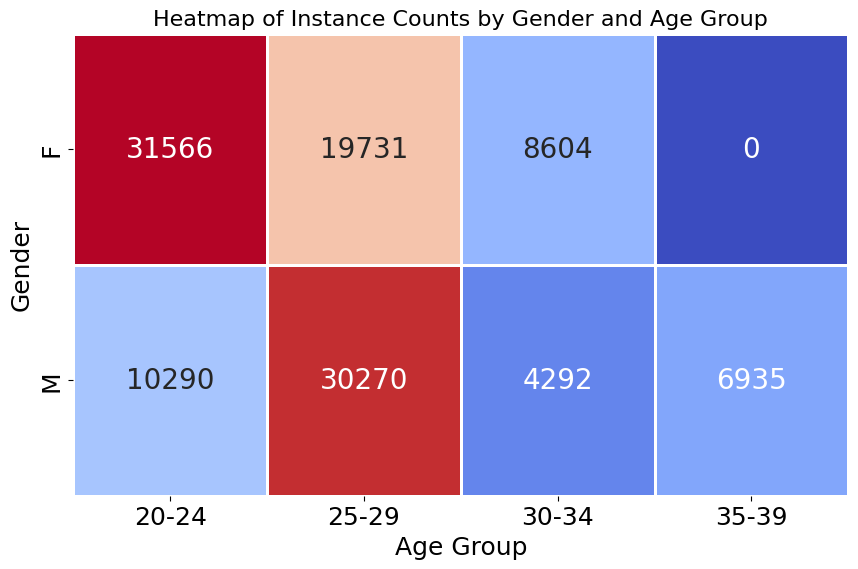


Emotion Distribution Information:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Frustrated or Discontented     3792
Aroused or Astonished          3745
Polite or Sleepy               3684
Anxious or Dejected            3642
Tired or Bored                 3635
Excited or Adventurous         3634
Neutral                        3629
Miserable or Sad               3623
Pleased or Glad                3559
Name: count, dtype: int64
Total Instances in Emotion Distribution: 111815
Percentages for each class:
Emotion
Confident or Attentive        16.471851
Passionate or Amused          15.393284
Frustrated or Impatient       14.600009
Distressed or Defiant          9.994187
Worried or Apathetic           5.903501
Tensed or Annoyed              4.333050
Delighted or Happy             

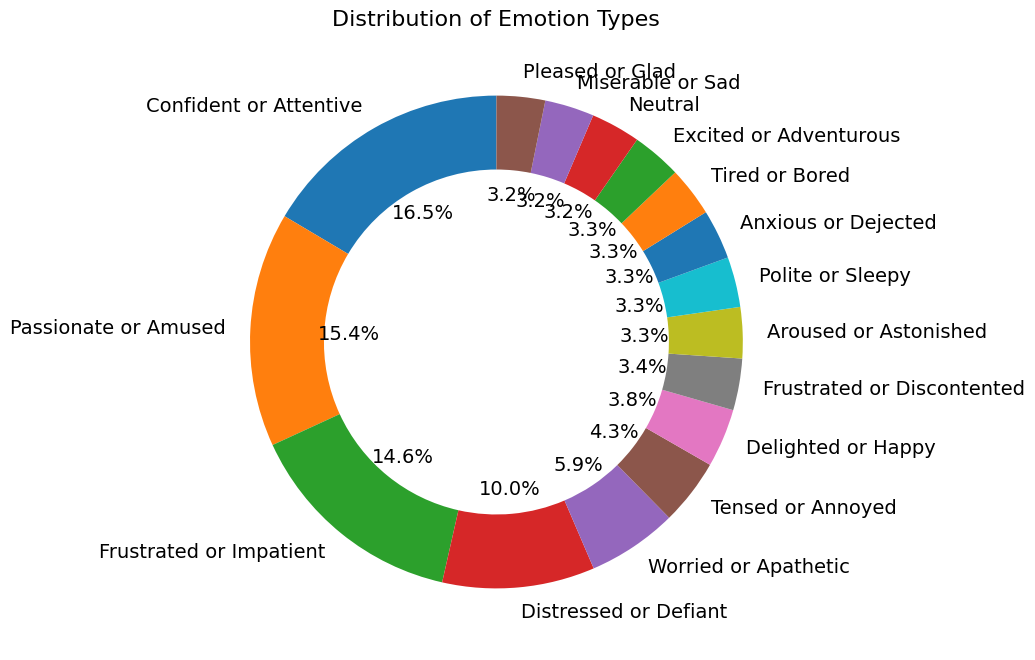


Age Group Distribution Information:
AGE
25-29    50001
20-24    41865
30-34    12896
35-39     6935
Name: count, dtype: int64
Total Instances in Age Group Distribution: 111697

Old vs New Age Group Counts (excluding Neutral):
25-29: Old=94126, New=50001, Difference=-44125
20-24: Old=68094, New=41865, Difference=-26229
30-34: Old=20437, New=12896, Difference=-7541
35-39: Old=13626, New=6935, Difference=-6691


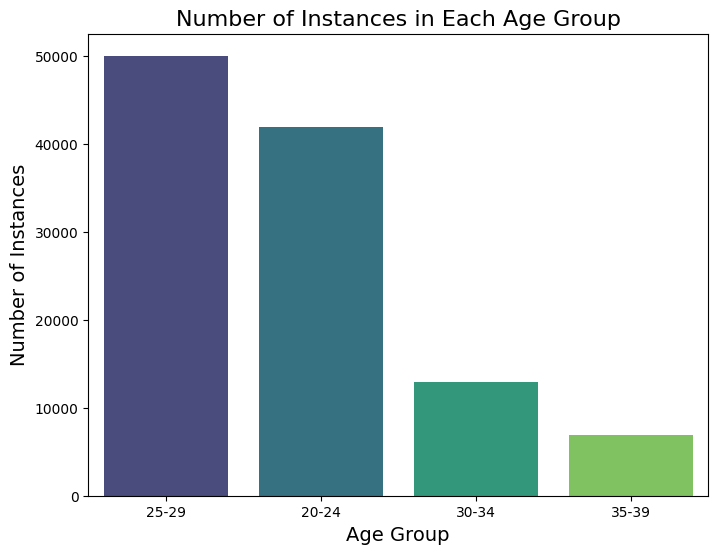


Gender Distribution Information:
GENDER
F    59939
M    51787
Name: count, dtype: int64
Total Instances in Gender Distribution: 111726

Old vs New Gender Class Counts (excluding Neutral):
M: Old=102182, New=51787, Difference=-50395
F: Old=94101, New=59939, Difference=-34162


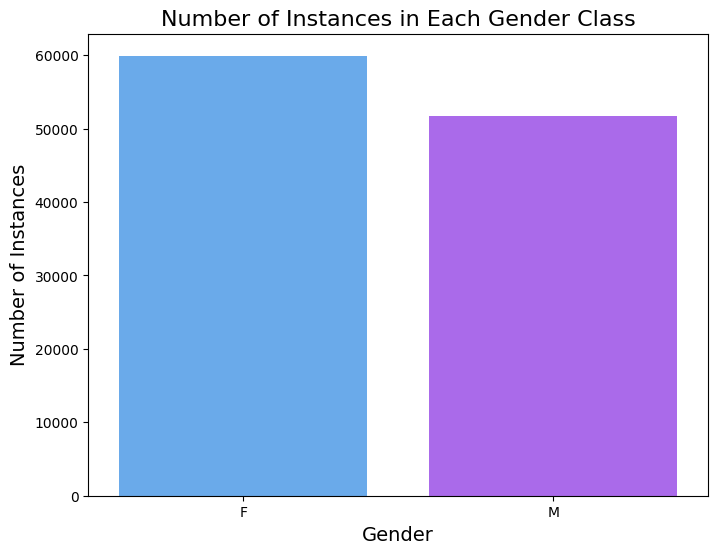

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

def clean_data(data):
    """Cleans data by handling missing values in crucial columns."""
    df = data.copy()
    print("Missing values before cleaning:")
    print(df.isnull().sum())
    
    # Drop rows where crucial columns ('Emotion', 'GENDER', 'AGE') have missing values
    crucial_columns = ['Emotion', 'GENDER', 'AGE']
    df = df.dropna(subset=crucial_columns)
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    return df

def balance_emotion_data(data):
    """Balances the Emotion data using ADASYN or SMOTE."""
    
    # Create a copy of the data to avoid modifying the original data
    df = data.copy()
    
    # Separate neutral emotion data from other emotions
    neutral_mask = df['Emotion'] == 'Neutral'
    df_neutral = df[neutral_mask]
    df_others = df[~neutral_mask]
    
    # Calculate target size for balanced classes
    emotion_counts = df['Emotion'].value_counts()
    target_size = int(np.median(emotion_counts))  # Use median as target size for balancing
    print(f"Target size per class: {target_size}")
    
    # Print old number of instances per class (excluding neutral instances)
    print("\nOld Emotion Class Distribution (excluding neutral):")
    emotion_counts_excluding_neutral = emotion_counts.drop('Neutral', errors='ignore')
    print(emotion_counts_excluding_neutral)
    print(f"Total Instances before balancing: {emotion_counts_excluding_neutral.sum()}")

    # Undersample neutral class to target size
    if len(df_neutral) > target_size:
        neutral_indices = np.random.choice(df_neutral.index, target_size, replace=False)
        df_neutral_balanced = df_neutral.loc[neutral_indices]
    else:
        df_neutral_balanced = df_neutral
    
    # Prepare the data for resampling
    df_combined = pd.concat([df_neutral_balanced, df_others])
    X = df_combined.drop(['Emotion', 'Emotion_Type'], axis=1)
    y = df_combined['Emotion']
    
    # Convert categorical variables to numeric codes
    X['GENDER'] = pd.Categorical(X['GENDER']).codes
    X['AGE'] = pd.Categorical(X['AGE']).codes
    
    # Handle missing values in numeric columns
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = X.copy()
    X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
    # Handle missing values in target variable 'y' if any
    y = y.fillna(y.mode()[0])
    
    # Create sampling strategy dictionary to control synthetic data generation
    sampling_strategy = {}
    for emotion in y.unique():
        count = Counter(y)[emotion]
        if count < target_size:
            sampling_strategy[emotion] = target_size
    
    # Apply ADASYN for resampling
    try:
        adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
        # Print new number of instances after balancing
        print("\nNew Emotion Class Distribution (after ADASYN or SMOTE):")
        print(Counter(y_resampled))
        print(f"Total Instances after balancing: {sum(Counter(y_resampled).values())}")
        
    except ValueError as e:
        print(f"ADASYN failed with error: {str(e)}")
        print("Falling back to SMOTE...")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    # Convert back to DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
    df_resampled['Emotion'] = y_resampled
    
    # Convert numeric values back to categorical
    gender_map = {0: 'F', 1: 'M'}
    age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
    df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
    df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    print(df_resampled.head())
    
    # Add back 'Emotion_Type'
    emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
    df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
    return df_resampled, df

def create_visualizations(data, old_data):
    """Creates visualizations for the dataset."""
    
    # 1. Heatmap for Gender and Age Distribution
    print("\nHeatmap Information:")
    heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    print(heatmap_data)
    print(f"Total Instances in Heatmap: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data
    
    # Print differences (excluding neutral)
    old_heatmap_data = old_data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    old_heatmap_data_excluding_neutral = old_heatmap_data.drop('Neutral', errors='ignore')
    print("\nOld vs New Heatmap Data (excluding Neutral):")
    print(old_heatmap_data_excluding_neutral.sum().sum(), " (Old) vs", heatmap_data.sum().sum(), " (New)")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
        annot_kws={"size": 20}
    )
    plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel('Gender', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

    # 2. Donut Chart for Emotion Distribution
    print("\nEmotion Distribution Information:")
    emotion_counts = data['Emotion'].value_counts()
    total_count = emotion_counts.sum()
    emotion_percentages = (emotion_counts / total_count) * 100
    print(emotion_counts)
    print(f"Total Instances in Emotion Distribution: {total_count}")  # Total instances in emotion data
    print("Percentages for each class:")
    print(emotion_percentages)
    
    # Print the difference in Emotion Classes (excluding Neutral)
    old_emotion_counts = old_data['Emotion'].value_counts()
    old_emotion_counts_excluding_neutral = old_emotion_counts.drop('Neutral', errors='ignore')
    print(f"Old Emotion Instances (excluding Neutral): {old_emotion_counts_excluding_neutral}")
    
    # Ignore neutral instances in old data count for diff calculation
    print("\nOld vs New Emotion Class Counts (excluding Neutral):")
    for emotion in old_emotion_counts_excluding_neutral.index:
        old_count = old_emotion_counts_excluding_neutral[emotion]
        new_count = emotion_counts.get(emotion, 0)
        diff = new_count - old_count
        print(f"{emotion}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
    )
    plt.title('Distribution of Emotion Types', fontsize=16)
    plt.show()

    # 3. Bar Plot for Age Group Distribution
    print("\nAge Group Distribution Information:")
    age_counts = data['AGE'].value_counts()
    print(age_counts)
    print(f"Total Instances in Age Group Distribution: {age_counts.sum()}")  # Total instances in age groups
    
    # Print differences in age groups (excluding neutral)
    old_age_counts = old_data['AGE'].value_counts()
    old_age_counts_excluding_neutral = old_age_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Age Group Counts (excluding Neutral):")
    for age_group in old_age_counts_excluding_neutral.index:
        old_count = old_age_counts_excluding_neutral[age_group]
        new_count = age_counts.get(age_group, 0)
        diff = new_count - old_count
        print(f"{age_group}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=age_counts.index,
        y=age_counts.values,
        palette='viridis'
    )
    plt.title('Number of Instances in Each Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

    # 4. Bar Plot for Gender Distribution
    print("\nGender Distribution Information:")
    gender_counts = data['GENDER'].value_counts()
    print(gender_counts)
    print(f"Total Instances in Gender Distribution: {gender_counts.sum()}")  # Total instances in gender classes
    
    # Print differences in gender classes (excluding neutral)
    old_gender_counts = old_data['GENDER'].value_counts()
    old_gender_counts_excluding_neutral = old_gender_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Gender Class Counts (excluding Neutral):")
    for gender in old_gender_counts_excluding_neutral.index:
        old_count = old_gender_counts_excluding_neutral[gender]
        new_count = gender_counts.get(gender, 0)
        diff = new_count - old_count
        print(f"{gender}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=gender_counts.index,
        y=gender_counts.values,
        palette='cool'
    )
    plt.title('Number of Instances in Each Gender Class', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

# Example workflow (replace 'data' with your dataset)
# data = pd.read_csv("your_dataset.csv")
cleaned_data = clean_data(data)
balanced_data, old_data = balance_emotion_data(cleaned_data)
create_visualizations(balanced_data, old_data)


In [8]:
print(len(balanced_data))
df = balanced_data
df['AGE'] = df['AGE'].replace({'20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39'})
protected_attribute_names = ['AGE', 'GENDER']
df['AGE'] = df['AGE'].map({"20-29": 0, "30-39": 1})
df['GENDER'] = df['GENDER'].map({"F": 0, "M": 1})
emotion_labels = [
    'Neutral', 'Frustrated or Impatient', 'Tensed or Annoyed', 'Distressed or Defiant', 
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy', 
    'Worried or Apathetic', 'Frustrated or Discontented', 'Aroused or Astonished', 'Miserable or Sad', 
    'Anxious or Dejected', 'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'
]
label_to_num = {label: num for num, label in enumerate(emotion_labels)}
print("Emotion Labels and Corresponding Encodings:")
print(label_to_num)
df['Emotion'] = df['Emotion'].replace(label_to_num)
emotion_type_map = {'Positive': 1, 'Negative': 0}
df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


111815
Emotion Labels and Corresponding Encodings:
{'Neutral': 0, 'Frustrated or Impatient': 1, 'Tensed or Annoyed': 2, 'Distressed or Defiant': 3, 'Confident or Attentive': 4, 'Passionate or Amused': 5, 'Pleased or Glad': 6, 'Delighted or Happy': 7, 'Worried or Apathetic': 8, 'Frustrated or Discontented': 9, 'Aroused or Astonished': 10, 'Miserable or Sad': 11, 'Anxious or Dejected': 12, 'Tired or Bored': 13, 'Polite or Sleepy': 14, 'Excited or Adventurous': 15}


<ipython-input-8-178a9ea29ff1>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion'] = df['Emotion'].replace(label_to_num)
<ipython-input-8-178a9ea29ff1>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


In [9]:
# Define label and protected attributes
label_names = ['Emotion_Type']

# Drop missing values
df = df.dropna()

In [10]:
import tensorflow as tf

# Fair AI (AIF360) - Preprocessing Algorithms

In [11]:
import numpy as np
import pandas as pd
from aif360.algorithms.postprocessing import EqOddsPostprocessing, CalibratedEqOddsPostprocessing, RejectOptionClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization,SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing
import time as time
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from aif360.metrics import ClassificationMetric
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import gc
import pandas as pd
from sklearn.model_selection import train_test_split
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization

positive_emotion_numbers = [0.0, 4.0, 5.0, 6.0, 7.0, 10.0, 14.0, 15.0]

# Gated Recurrent Unit

In [15]:
protected_attribute_configs = [
    {
        "protected_attribute_names": ["GENDER"],
        "privileged_protected_attributes": [{"GENDER": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1}],
        "sensitive_attribute": "GENDER"
    },
    {
        "protected_attribute_names": ["AGE"],
        "privileged_protected_attributes": [{"AGE": 0}],
        "unprivileged_protected_attributes": [{"AGE": 1}],
        "sensitive_attribute": "AGE"
    },
    {
        "protected_attribute_names": ["GENDER", "AGE"],
        "privileged_protected_attributes": [{"GENDER": 0, "AGE": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1, "AGE": 1}],
        "sensitive_attribute": "GENDER"
    }
]

fairness_results = pd.DataFrame()

for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=label_names,
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    
    def build_gru_model(input_shape, num_classes):
        model = Sequential()
        model.add(GRU(128, return_sequences=True, input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(64, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(32))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(num_classes, activation='softmax'))
        
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
        
        return model
    
    # Load data
    X = df.drop(columns=['Emotion'])
    y = df['Emotion']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    input_shape = (X_train.shape[1], 1)
    num_classes = len(y.unique())
    
    def get_lr_scheduler():
        return ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2, min_delta=0.0001, cooldown=1, verbose=1, min_lr=1e-6)
    
    lr_scheduler = get_lr_scheduler()
    
    # Build and train model
    gru_model = build_gru_model(input_shape, num_classes)
    gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])
    
    predictions = gru_model.predict(X_test)
    predicted_labels = predictions.argmax(axis=1)
    
    pred_df = X_test.copy()
    pred_df['Emotion'] = predicted_labels
    pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    y_pred = pred_df['Emotion'].values
    pred_df.drop(columns=['Emotion'], inplace=True)
    
    test_df = X_test.copy()
    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    def compute_fairness_metrics(original_dataset, classified_dataset, privileged_groups, unprivileged_groups, description):
        global fairness_results
        
        metrics = ClassificationMetric(
            original_dataset,
            classified_dataset,
            privileged_groups=privileged_groups,
            unprivileged_groups=unprivileged_groups
        )
        
        fairness_metrics = {
            "Description": description,
            "Base Rate": metrics.base_rate(),
            "Selection Rate": metrics.selection_rate(),
            "Disparate Impact": metrics.disparate_impact(),
            "Statistical Parity Difference": metrics.statistical_parity_difference(),
            "Between Group Coefficient of Variation": metrics.between_group_coefficient_of_variation(),
            "Between Group Generalized Entropy Index": metrics.between_group_generalized_entropy_index(),
            "Between Group Theil Index": metrics.between_group_theil_index(),
            "Mean Difference": metrics.mean_difference(),
            "Smoothed Empirical Differential Fairness": metrics.smoothed_empirical_differential_fairness(),
        }
        
        fairness_metrics_df = pd.DataFrame([fairness_metrics])
        fairness_results = pd.concat([fairness_results, fairness_metrics_df], ignore_index=True)
        
        consistency_value = metrics.consistency()
        if isinstance(consistency_value, (np.ndarray, list)):
            consistency_value = np.mean(consistency_value)
        print(f"  Consistency: {consistency_value:.4f}")
        
        for key, value in fairness_metrics.items():
            if key != "Description":
                if isinstance(value, (np.ndarray, list)):
                    value = np.mean(value)
                print(f"  {key}: {value:.4f}")
        
        return metrics
    
    compute_fairness_metrics(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, "GRU model")

    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)


    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    train_dir, test_dir = dir_processed.split([0.8], shuffle=True)
    train_reweighed, test_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    
    train_dir_df = train_dir.convert_to_dataframe()[0]
    test_dir_df = test_dir.convert_to_dataframe()[0]
    train_reweighed_df = train_reweighed.convert_to_dataframe()[0]
    test_reweighed_df = test_reweighed.convert_to_dataframe()[0]
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    
    def prepare_data_for_gru(dataset, weights):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        features_reshaped = np.expand_dims(features.values, axis=2)
        return features_reshaped, labels, weights
    
    X_train_dir, y_train_dir, train_weights_dir = prepare_data_for_gru(train_dir_df, dir_weights)
    X_test_dir, y_test_dir, _ = prepare_data_for_gru(test_dir_df, dir_weights)
    
    X_train_reweighed, y_train_reweighed, train_weights_rw = prepare_data_for_gru(train_reweighed_df, rw_weights)
    X_test_reweighed, y_test_reweighed, _ = prepare_data_for_gru(test_reweighed_df, rw_weights)
    
    gru_dir = build_gru_model(X_train_dir.shape[1:], 16)
    gru_dir.fit(X_train_dir, y_train_dir, epochs=5, batch_size=128, sample_weight=train_weights_dir, validation_data=(X_test_dir, y_test_dir))
    
    y_pred_dir = np.argmax(gru_dir.predict(X_test_dir), axis=1)
    
    gru_reweighed = build_gru_model(X_train_reweighed.shape[1:],16)
    gru_reweighed.fit(X_train_reweighed, y_train_reweighed, epochs=5, batch_size=128, sample_weight=train_weights_rw, validation_data=(X_test_reweighed, y_test_reweighed))
    
    y_pred_reweighed = np.argmax(gru_reweighed.predict(X_test_reweighed), axis=1)
    
    pred_reweighed_df = test_reweighed_df.copy()
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    
    pred_dir_df = test_dir_df.copy()
    pred_dir_df['Emotion'] = y_pred_dir
    
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=test_dir.protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=test_reweighed.protected_attribute_names)
    
    compute_fairness_metrics(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, "DIR model")
    compute_fairness_metrics(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, "Reweighed model")
    # Store results
    fairness_results.to_csv('fairness_metrics.csv', index=False)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1397/1397 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3168 - loss: 2.1517 - val_accuracy: 0.6593 - val_loss: 0.9007 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6621 - loss: 0.9306 - val_accuracy: 0.7742 - val_loss: 0.6102 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7386 - loss: 0.7383 - val_accuracy: 0.7471 - val_loss: 0.6985 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7734 - loss: 0.6407 - val_accuracy: 0.8371 - val_loss: 0.4404 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7927 - loss: 0.5827 - val_accuracy: 0.8606 - val_loss: 0.3934 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Consistency: 0.9526
  Base Rate: 0.5252
  Selection Rate: 0.5252
  Disparate Impact: 1.2813
  Statistical Parity Difference: 0.1306
 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1876 - loss: 2.6936 - val_accuracy: 0.5191 - val_loss: 1.4423
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4910 - loss: 1.5086 - val_accuracy: 0.6634 - val_loss: 0.9561
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6177 - loss: 1.1317 - val_accuracy: 0.7174 - val_loss: 0.8025
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6779 - loss: 0.9578 - val_accuracy: 0.7489 - val_loss: 0.7105
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7108 - loss: 0.8550 - val_accuracy: 0.7472 - val_loss: 0.6948
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2047 - loss: 2.6137 - val_accuracy: 0.5691 - val_loss: 1.2924
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5067 - loss: 1.4425 - val_accuracy: 0.6428 - val_loss: 1.0029
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6102 - loss: 1.1336 - val_accuracy: 0.7233 - val_loss: 0.7880
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6665 - loss: 0.9693 - val_accuracy: 0.7302 - val_loss: 0.7469
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7024 - loss: 0.8593 - val_accuracy: 0.7570 - val_loss: 0.7010
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Consistency: 0.9583
  Base Rate: 0.5171
  Selection Rate: 0.4885
  Disparate Impact: 1.2875
  Statistical Parity Difference: 0.1238
  Between Group Coefficient of Variation: 0.0017
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.1238
  Smoothed Empirical Differential

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3111 - loss: 2.1699 - val_accuracy: 0.7132 - val_loss: 0.7686 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6729 - loss: 0.9074 - val_accuracy: 0.7854 - val_loss: 0.5735 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7463 - loss: 0.7051 - val_accuracy: 0.7890 - val_loss: 0.5622 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7825 - loss: 0.6130 - val_accuracy: 0.8380 - val_loss: 0.4568 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7972 - loss: 0.5700 - val_accuracy: 0.8533 - val_loss: 0.3957 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Consistency: 0.9526
  Base Rate: 0.5252
  Selection Rate: 0.5252
  Disparate Impact: 1.0072
  Statistical Parity Difference

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2089 - loss: 2.6573 - val_accuracy: 0.5505 - val_loss: 1.3396
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5033 - loss: 1.4756 - val_accuracy: 0.6846 - val_loss: 0.9158
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6162 - loss: 1.1278 - val_accuracy: 0.7315 - val_loss: 0.7755
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6629 - loss: 0.9938 - val_accuracy: 0.7470 - val_loss: 0.7095
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7069 - loss: 0.8640 - val_accuracy: 0.7889 - val_loss: 0.5932
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2055 - loss: 2.6336 - val_accuracy: 0.5021 - val_loss: 1.5355
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5109 - loss: 1.4475 - val_accuracy: 0.6648 - val_loss: 0.9895
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6177 - loss: 1.1267 - val_accuracy: 0.7237 - val_loss: 0.7952
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6715 - loss: 0.9570 - val_accuracy: 0.6850 - val_loss: 0.9194
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6815 - loss: 0.9452 - val_accuracy: 0.7759 - val_loss: 0.6438
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Consistency: 0.9545
  Base Rate: 0.5168
  Selection Rate: 0.5373
  Disparate Impact: 0.9990
  Statistical Parity Difference: -0.0005
  Between Group Coefficient of Variation: 0.0013
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: -0.0005
  Smoothed Empirical Differenti

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.2893 - loss: 2.2903 - val_accuracy: 0.6941 - val_loss: 0.8035 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6639 - loss: 0.9264 - val_accuracy: 0.7446 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7462 - loss: 0.7171 - val_accuracy: 0.8285 - val_loss: 0.4794 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7856 - loss: 0.6087 - val_accuracy: 0.8384 - val_loss: 0.4516 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8085 - loss: 0.5467 - val_accuracy: 0.8485 - val_loss: 0.4076 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  Consistency: 0.9526
  Base Rate: 0.5252
  Selection Rate: 0.5252
  Disparate Impact: 1.3874
  Statistical Parity Difference: 0.1880
 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1954 - loss: 2.6677 - val_accuracy: 0.4877 - val_loss: 1.4460
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4970 - loss: 1.4806 - val_accuracy: 0.6720 - val_loss: 0.9674
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6076 - loss: 1.1478 - val_accuracy: 0.6974 - val_loss: 0.8587
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6677 - loss: 0.9808 - val_accuracy: 0.6957 - val_loss: 0.8660
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6908 - loss: 0.9112 - val_accuracy: 0.7624 - val_loss: 0.6722
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2003 - loss: 2.6356 - val_accuracy: 0.4554 - val_loss: 1.6074
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4969 - loss: 1.4983 - val_accuracy: 0.6518 - val_loss: 1.0082
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6092 - loss: 1.1487 - val_accuracy: 0.7141 - val_loss: 0.8050
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6702 - loss: 0.9622 - val_accuracy: 0.7660 - val_loss: 0.6692
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7100 - loss: 0.8480 - val_accuracy: 0.7719 - val_loss: 0.6192
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
  Consistency: 0.9551
  Base Rate: 0.5186
  Selection Rate: 0.5368
  Disparate Impact: 1.4604
  Statistical Parity Difference: 0.2224
  Between Group Coefficient of Variation: 0.8945
  Between Group Generalized Entropy Index: 0.4000
  Between Group Theil Index: 0.5876
  Mean Difference: 0.2224
  Smoothed Empirical Differential

In [16]:
fairness_results

,Description,Base Rate,Selection Rate,Disparate Impact,Statistical Parity Difference,Between Group Coefficient of Variation,Between Group Generalized Entropy Index,Between Group Theil Index,Mean Difference,Smoothed Empirical Differential Fairness
0,GRU model,0.525204,0.525204,1.281318,0.130623,0.000000,0.000000e+00,0.000000e+00,0.130623,0.279484
1,DIR model,0.517101,0.488450,1.287478,0.123755,0.001734,1.503064e-06,1.502955e-06,0.123755,0.252575
2,Reweighed model,0.519071,0.542349,1.258319,0.125247,0.000237,2.809293e-08,2.809329e-08,0.125247,0.265798
3,GRU model,0.525204,0.525204,1.007200,0.003777,0.000000,0.000000e+00,0.000000e+00,0.003777,0.007962
4,DIR model,0.516788,0.537291,0.998977,-0.000550,0.001342,9.006690e-07,9.013639e-07,-0.000550,0.006348
5,Reweighed model,0.521130,0.538097,0.960483,-0.021414,0.004972,1.236126e-05,1.239612e-05,-0.021414,0.016969
6,GRU model,0.525204,0.525204,1.387385,0.187980,0.892078,3.979018e-01,5.854526e-01,0.187980,0.702154
7,DIR model,0.518623,0.536843,1.460356,0.222411,0.894467,4.000359e-01,5.876027e-01,0.222411,0.708193
8,Reweighed model,0.521936,0.521085,1.358083,0.169865,0.893622,3.992797e-01,5.869836e-01,0.169865,0.708604
